In [2]:
print(__doc__)

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy  
from scipy import linalg

from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale  
from sklearn import decomposition
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
import itertools

from sklearn import mixture


style.use("ggplot")
%matplotlib inline



Automatically created module for IPython interactive environment


In [3]:
#dataset2
raw_data = pd.read_csv('C:/Users/Chenming/Desktop/assignment3/Data3_income census/adult.csv')
#age: numeric
#fnlwgt: numeric
#delete education because education number is repeating to this feature
#education_num: numeric
#capital_gain:numeric
#capital_loss:numeric
#hours_per_week:numeric
#native_country: has too many non-numeric values, delete
data=raw_data
data.drop
data['age']=raw_data.age
data['age']=data.age.astype(int)
data['fnlwgt']=raw_data.fnlwgt
data['fnlwgt']=data.fnlwgt.astype(int)
data['education_num']=raw_data.education_num
data['education_num']=data.education_num.astype(int)
data['capital_gain']=raw_data.capital_gain
data['capital_gain']=data.capital_gain.astype(int)
data['capital_loss']=raw_data.capital_loss
data['capital_loss']=data.capital_loss.astype(int)
data['hours_per_week']=raw_data.hours_per_week
data['hours_per_week']=data.hours_per_week.astype(int)

#convert workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked
raw_data['workclass'] = raw_data.workclass.str.replace('Without-pay','0')
raw_data['workclass'] = raw_data.workclass.str.replace('Never-worked','1')
raw_data['workclass'] = raw_data.workclass.str.replace('Private','2')
raw_data['workclass'] = raw_data.workclass.str.replace('Self-emp-not-inc','3')
raw_data['workclass'] = raw_data.workclass.str.replace('Self-emp-inc','4')
raw_data['workclass'] = raw_data.workclass.str.replace('Federal-gov','5')
raw_data['workclass'] = raw_data.workclass.str.replace('Local-gov','6')
raw_data['workclass'] = raw_data.workclass.str.replace('State-gov','7')
raw_data['workclass'] = raw_data.workclass.str.replace('?','8')

data['workclass']=raw_data.workclass
data['workclass']=data.workclass.astype(int)

#convert marital_status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse 
raw_data['marital_status'] = raw_data.marital_status.str.replace('Married-civ-spouse','0')
raw_data['marital_status'] = raw_data.marital_status.str.replace('Divorced','1')
raw_data['marital_status'] = raw_data.marital_status.str.replace('Never-married','2')
raw_data['marital_status'] = raw_data.marital_status.str.replace('Separated','3')
raw_data['marital_status'] = raw_data.marital_status.str.replace('Widowed','4')
raw_data['marital_status'] = raw_data.marital_status.str.replace('Married-spouse-absent','5')
raw_data['marital_status'] = raw_data.marital_status.str.replace('Married-AF-spouse','6')
data['marital_status']=raw_data.marital_status
data['marital_status']=data.marital_status.astype(int)

#convert occupation:Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, 
#Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, 
#Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, 
#Armed-Forces
raw_data['occupation'] = raw_data.occupation.str.replace('Tech-support','0')
raw_data['occupation'] = raw_data.occupation.str.replace('Craft-repair','1')
raw_data['occupation'] = raw_data.occupation.str.replace('Other-service','2')
raw_data['occupation'] = raw_data.occupation.str.replace('Sales','3')
raw_data['occupation'] = raw_data.occupation.str.replace('Exec-managerial','4')
raw_data['occupation'] = raw_data.occupation.str.replace('Prof-specialty','5')
raw_data['occupation'] = raw_data.occupation.str.replace('Handlers-cleaners','6')
raw_data['occupation'] = raw_data.occupation.str.replace('Machine-op-inspct','7')
raw_data['occupation'] = raw_data.occupation.str.replace('Adm-clerical','8')
raw_data['occupation'] = raw_data.occupation.str.replace('Farming-fishing','9')
raw_data['occupation'] = raw_data.occupation.str.replace('Transport-moving','10')
raw_data['occupation'] = raw_data.occupation.str.replace('Priv-house-serv','11')
raw_data['occupation'] = raw_data.occupation.str.replace('Protective-serv','12')
raw_data['occupation'] = raw_data.occupation.str.replace('Armed-Forces','13')
raw_data['occupation'] = raw_data.occupation.str.replace('?','14')

data['occupation']=raw_data.occupation
data['occupation']=data.occupation.astype(int)

#relationship:Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried
raw_data['relationship'] = raw_data.relationship.str.replace('Wife','0')
raw_data['relationship'] = raw_data.relationship.str.replace('Own-child','1')
raw_data['relationship'] = raw_data.relationship.str.replace('Husband','2')
raw_data['relationship'] = raw_data.relationship.str.replace('Not-in-family','3')
raw_data['relationship'] = raw_data.relationship.str.replace('Other-relative','4')
raw_data['relationship'] = raw_data.relationship.str.replace('Unmarried','5')
data['relationship']=raw_data.relationship
data['relationship']=data.relationship.astype(int)

#race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black
raw_data['race'] = raw_data.race.str.replace('White','0')
raw_data['race'] = raw_data.race.str.replace('Asian-Pac-Islander','1')
raw_data['race'] = raw_data.race.str.replace('Amer-Indian-Eskimo','2')
raw_data['race'] = raw_data.race.str.replace('Other','3')
raw_data['race'] = raw_data.race.str.replace('Black','4')
data['race']=raw_data.race
data['race']=data.race.astype(int)

#sex: Female, Male
raw_data['sex'] = raw_data.sex.str.replace('Female','0')
raw_data['sex'] = raw_data.sex.str.replace('Male','1')
data['sex']=raw_data.sex
data['sex']=data.sex.astype(int)

#set label_name column
data['income_name'] = raw_data.income

#income: >50K, <=50K
raw_data['income'] = raw_data.income.str.replace('>50K','1')
raw_data['income'] = raw_data.income.str.replace('<=50K','0')
raw_data['income'] = raw_data.income
raw_data['income'] = raw_data.income.astype(int)

datalist_label = data.income
datalist_names = data.income_name
datalist_label_names = np.array(['>50K','<=50K'])
datalist = data.drop(['fnlwgt','education','native_country','income','income_name'], axis=1)
datalist_array = datalist.values
datalist_array

array([[   39,     7,    13, ...,  2174,     0,    40],
       [   50,     3,    13, ...,     0,     0,    13],
       [   38,     2,     9, ...,     0,     0,    40],
       ..., 
       [   58,     2,     9, ...,     0,     0,    40],
       [   22,     2,     9, ...,     0,     0,    20],
       [   52,     4,     9, ..., 15024,     0,    40]])

In [4]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,income_name
0,39,7,77516,Bachelors,13,2,8,3,0,1,2174,0,40,United-States,0,<=50K
1,50,3,83311,Bachelors,13,0,4,2,0,1,0,0,13,United-States,0,<=50K
2,38,2,215646,HS-grad,9,1,6,3,0,1,0,0,40,United-States,0,<=50K
3,53,2,234721,11th,7,0,6,2,4,1,0,0,40,United-States,0,<=50K
4,28,2,338409,Bachelors,13,0,5,0,4,0,0,0,40,Cuba,0,<=50K


In [5]:
EM_data = data.drop(['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country'], axis=1)
EM_data.head()

,income,income_name
0,0,<=50K
1,0,<=50K
2,0,<=50K
3,0,<=50K
4,0,<=50K


In [6]:
#NN  on X = datalist_array, y = datalist_label
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.cross_validation import StratifiedKFold
import time
from sklearn.neural_network import MLPClassifier

skf = StratifiedKFold(datalist_label, n_folds=4)
# Only take the first fold.
train_index, test_index = next(iter(skf))


X_train = datalist_array[train_index]
y_train = datalist_label[train_index].values
X_test  = datalist_array[test_index]
y_test  = datalist_label[test_index].values

C:\Users\Chenming\AppData\Roaming\Python\Python36\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
#NN of original data
from sklearn.metrics import explained_variance_score

start_time = time.time()

mlp = MLPClassifier(hidden_layer_sizes=(50,10), max_iter=1000, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.03)

mlp.fit(X_train, y_train)
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)
elapsed_time = time.time() - start_time

print("Training set score: %f" % mlp.score(X_train, y_train))
print ("Training variance: ", explained_variance_score(y_train, y_train_pred, multioutput='uniform_average'))
print("Test set score: %f" % mlp.score(X_test, y_test))
print ("Testing variance: ", explained_variance_score(y_test, y_test_pred, multioutput='uniform_average'))
print ("Running Time: ", elapsed_time)

Iteration 1, loss = 2.56473638
Iteration 2, loss = 2.46891892
Iteration 3, loss = 2.46835193
Iteration 4, loss = 2.46870911
Iteration 5, loss = 2.46815765
Iteration 6, loss = 2.46877567
Iteration 7, loss = 2.46817718
Iteration 8, loss = 2.46885787
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Training set score: 0.789926
Training variance:  -0.0028194600386
Test set score: 0.790935
Testing variance:  -0.0025881716118
Running Time:  0.5680325031280518


In [8]:
from sklearn.decomposition import PCA
def pca_code(data):
    pca = PCA()
    X_transformed = pca.fit_transform(data)
    # We center the data and compute the sample covariance matrix.
    X_centered = data - np.mean(data, axis=0)
    cov_matrix = np.dot(X_centered.T, X_centered) / len(data)
    eigenvalues = pca.explained_variance_
    e_v=[]
    for eigenvalue, eigenvector in zip(eigenvalues, pca.components_):    
        e_v.append(eigenvalue)
    return e_v

In [9]:
eig_val = pca_code(datalist_array)
eig_val

[54542704.134087689,
 162215.3871397707,
 187.21854487720387,
 148.56024315377371,
 13.73658140377858,
 6.4271314811525562,
 2.4238906492911871,
 2.0827227059629392,
 1.3550232157773709,
 0.7902204752017965,
 0.1783168574248592]

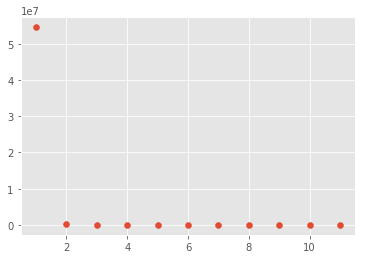

In [10]:
x_axis=[1,2,3,4,5,6,7,8,9,10,11]
plt.scatter(x_axis, eig_val)

In [11]:
#comment the below change to plot the original X################
pca = decomposition.PCA(n_components=3)
pca.fit(datalist_array)
data_PCA = pca.transform(datalist_array)
data_PCA
#Here new X is the new arrays of datalist after PCA treatment, 
#can be used to evaluate with K-means and EM algorithms, not necessary to plot
##################################
#Original data
#X = datalist_array
#X

array([[  1.09650063e+03,  -8.54060881e+01,   3.98741437e-01],
       [ -1.07749797e+03,  -8.91895976e+01,   4.09537061e+00],
       [ -1.07749636e+03,  -8.91699519e+01,  -2.79138164e-01],
       ..., 
       [ -1.07749355e+03,  -8.91303371e+01,   1.89489684e+01],
       [ -1.07750129e+03,  -8.92378982e+01,  -2.10753904e+01],
       [  1.39464829e+04,  -6.31551869e+01,   1.05178766e+01]])

In [12]:
pca = decomposition.PCA(n_components=2)
pca.fit(datalist_array)
data_PCA = pca.transform(datalist_array)
data_PCA

array([[  1096.50063315,    -85.40608807],
       [ -1077.49796659,    -89.18959761],
       [ -1077.49635505,    -89.16995189],
       ..., 
       [ -1077.49355247,    -89.13033712],
       [ -1077.5012936 ,    -89.23789817],
       [ 13946.48290914,    -63.15518694]])

In [13]:
#NN upon PCA dataset
X_train = data_PCA[train_index]
y_train = datalist_label[train_index]
X_test  = data_PCA[test_index]
y_test  = datalist_label[test_index]

start_time = time.time()

mlp = MLPClassifier(hidden_layer_sizes=(50,10), max_iter=1000, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.03)

mlp.fit(X_train, y_train)
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)
elapsed_time = time.time() - start_time

print("Training set score: %f" % mlp.score(X_train, y_train))
print ("Training variance: ", explained_variance_score(y_train, y_train_pred, multioutput='uniform_average'))
print("Test set score: %f" % mlp.score(X_test, y_test))
print ("Testing variance: ", explained_variance_score(y_test, y_test_pred, multioutput='uniform_average'))
print ("Running Time: ", elapsed_time)

Iteration 1, loss = 27321843.50316176
Iteration 2, loss = 31536105.00380607
Iteration 3, loss = 31534870.64441373
Iteration 4, loss = 31533621.88661651
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Training set score: 0.759214
Training variance:  0.0
Test set score: 0.759121
Testing variance:  0.0
Running Time:  0.2820160388946533


In [14]:
n_classes=2
len(train_index)

24420

In [15]:
# EM Try GMMs with K=2
new_component=2
cv_type='spherical'
gmm = mixture.GaussianMixture(n_components=new_component,
                                      covariance_type=cv_type)
gmm.fit(data_PCA)
datalist_pred = gmm.predict(data_PCA)

EM_data['K2_PCA_label']=datalist_pred
K2_PCA_label = datalist_pred
EM_PCA2_prob = gmm.predict_proba(data_PCA)

In [16]:
tb1 = pd.crosstab(EM_data['income_name'],datalist_pred)
#data_label.head()
tb1

col_0,0,1
income_name,,
<=50K,0,24720
>50K,159,7682


In [17]:
#EM assign test K=2 label
def em_K1_label(alpha):
    label_max = max(tb1.iloc[i,alpha] for i in range(2))
    if tb1.iloc[0,alpha] == label_max:
        return '<=50K'
    if tb1.iloc[1,alpha] == label_max:
        return '>50K'
EM_data['K2_PCA_label_name']=EM_data['K2_PCA_label'].apply(em_K1_label)
EM_data.head()

,income,income_name,K2_PCA_label,K2_PCA_label_name
0,0,<=50K,1,<=50K
1,0,<=50K,1,<=50K
2,0,<=50K,1,<=50K
3,0,<=50K,1,<=50K
4,0,<=50K,1,<=50K


In [18]:
K2_PCA_accuracy = len(EM_data[EM_data['income_name']==EM_data['K2_PCA_label_name']])/len(EM_data)
print('K=2 PCA EM -> {0:.4f}%'.format(K2_PCA_accuracy*100))

K=2 PCA EM -> 76.4074%


In [19]:
# EM K=17, full
new_component=17
cv_type='full'
gmm = mixture.GaussianMixture(n_components=new_component,
                                      covariance_type=cv_type)
gmm.fit(data_PCA)
datalist_pred = gmm.predict(data_PCA)

EM_data['K17_PCA_label']=datalist_pred
K17_PCA_label = datalist_pred
EM_PCA17_prob = gmm.predict_proba(data_PCA)

In [20]:
tb1 = pd.crosstab(EM_data['income_name'],datalist_pred)
#data_label.head()
tb1

col_0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
income_name,,,,,,,,,,,,,,,,,
<=50K,22939,0,0,178,5,746,0,345,1,6,2,444,0,0,0,0,54
>50K,5391,159,347,193,36,773,284,3,0,57,0,89,81,105,15,37,271


In [21]:
#EM: assign test K=17 label

EM_data['K17_PCA_label_name']=EM_data['K17_PCA_label'].apply(em_K1_label)
EM_data.head()

,income,income_name,K2_PCA_label,K2_PCA_label_name,K17_PCA_label,K17_PCA_label_name
0,0,<=50K,1,<=50K,7,<=50K
1,0,<=50K,1,<=50K,0,<=50K
2,0,<=50K,1,<=50K,0,<=50K
3,0,<=50K,1,<=50K,0,<=50K
4,0,<=50K,1,<=50K,0,<=50K


In [22]:
K17_PCA_accuracy = len(EM_data[EM_data['income_name']==EM_data['K17_PCA_label_name']])/len(EM_data)
print('K=17 PCA EM -> {0:.4f}%'.format(K17_PCA_accuracy*100))

K=17 PCA EM -> 80.1235%


In [23]:
#K-means
data_PCA_df = pd.DataFrame(data=data_PCA[0:,0:],
                   columns=['PCA1','PCA2'])
data_PCA_df['income'] = datalist_label
data_PCA_df['income_name'] = datalist_names
data_PCA_df.head()

,PCA1,PCA2,income,income_name
0,1096.500633,-85.406088,0,<=50K
1,-1077.497967,-89.189598,0,<=50K
2,-1077.496355,-89.169952,0,<=50K
3,-1077.494285,-89.140365,0,<=50K
4,-1077.497600,-89.187903,0,<=50K


In [24]:
#EM treated for NN
#choose EM_PCA2_prob and K17_PCA_label 

data_PCA_EM_NN_df = pd.DataFrame(data=data_PCA[0:,0:],
                   columns=['PCA1','PCA2'])
data_PCA_EM_NN_df['PCA2_label'] = EM_data['K2_PCA_label']
#data_PCA_EM_NN_df['PCA17_label'] = EM_data['K17_PCA_label']
data_PCA_EM_NN=data_PCA_EM_NN_df.values

In [25]:
#NN upon PCA EM K=2 or 17 dataset
X_train = data_PCA_EM_NN[train_index]
y_train = datalist_label[train_index]
X_test  = data_PCA_EM_NN[test_index]
y_test  = datalist_label[test_index]

start_time = time.time()

mlp = MLPClassifier(hidden_layer_sizes=(50,10), max_iter=1000, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.03)

mlp.fit(X_train, y_train)
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)
elapsed_time = time.time() - start_time

print("Training set score: %f" % mlp.score(X_train, y_train))
print ("Training variance: ", explained_variance_score(y_train, y_train_pred, multioutput='uniform_average'))
print("Test set score: %f" % mlp.score(X_test, y_test))
print ("Testing variance: ", explained_variance_score(y_test, y_test_pred, multioutput='uniform_average'))
print ("Running Time: ", elapsed_time)

Iteration 1, loss = 3851.09224409
Iteration 2, loss = 4394.21278981
Iteration 3, loss = 4394.04055970
Iteration 4, loss = 4393.86658003
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Training set score: 0.759214
Training variance:  0.0
Test set score: 0.759121
Testing variance:  0.0
Running Time:  0.29201674461364746


In [26]:
data_PCA_df.describe()

,PCA1,PCA2,income
count,3.256100e+04,3.256100e+04,32561.000000
mean,1.477046e-13,9.444516e-16,0.240810
std,7.385303e+03,4.027597e+02,0.427581
min,-1.085029e+03,-8.927864e+01,0.000000
25%,-1.077498e+03,-8.918906e+01,0.000000
50%,-1.077496e+03,-8.916197e+01,0.000000
75%,-1.077494e+03,-8.913080e+01,0.000000
max,9.892136e+04,4.266911e+03,1.000000


In [27]:
data_PCA_df.pivot_table(index='income_name', values=['PCA1','PCA2'],aggfunc=np.mean)

,PCA1,PCA2
income_name,,
<=50K,-928.836358,-35.774153
>50K,2928.304395,112.783710


In [28]:
d_corr_PCA1=data_PCA_df.iloc[:,[0,1,2]].corr()
d_corr_PCA1
#acceptable related to safety most, for features only lug_boot related to persons

,PCA1,PCA2,income
PCA1,1.000000e+00,-1.806608e-13,0.223314
PCA2,-1.806608e-13,1.000000e+00,0.157713
income,2.233141e-01,1.577134e-01,1.000000


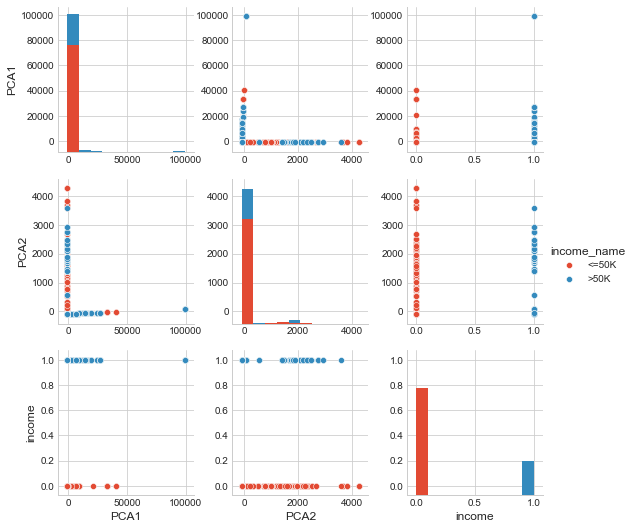

In [29]:
sns.set_style('whitegrid')
sns.pairplot(data_PCA_df.iloc[:,[0,1,2,3]], hue='income_name')
plt.show()

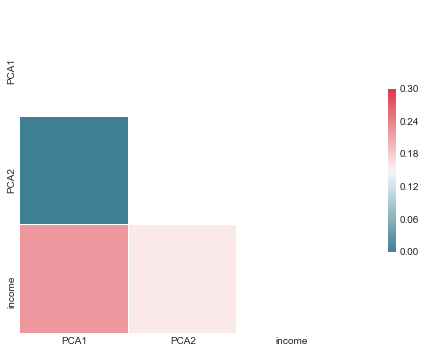

In [30]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,6))
mask = np.zeros_like(d_corr_PCA1, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(d_corr_PCA1,mask=mask, cmap=cmap, vmax=.3,
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

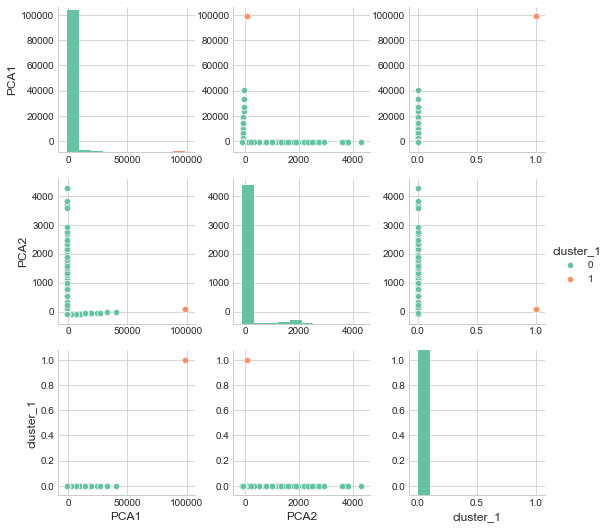

In [31]:
#K=2 K-means
kmeans_model_1 = KMeans(n_clusters=2,random_state=123)
distances_1 = kmeans_model_1.fit_transform(data_PCA_df.iloc[:,0:2])
labels_1 = kmeans_model_1.labels_
data_PCA_df['cluster_1']=labels_1
with sns.color_palette("Set2", 10):
    sns.pairplot(data_PCA_df.iloc[:,[0,1,4]], hue='cluster_1')

In [32]:
#statistics of acceptable_label cluster_1 vs species
tb1 = pd.crosstab(data_PCA_df['income_name'],labels_1)
tb1

col_0,0,1
income_name,,
<=50K,24720,0
>50K,7682,159


In [33]:
#PCA cluster_1_label
def cluster_1_label(alpha):
    label_max = max(tb1.iloc[i,alpha] for i in range(2))
    if tb1.iloc[0,alpha] == label_max:
        return '<=50K'
    if tb1.iloc[1,alpha] == label_max:
        return '>50K'
data_PCA_df['cluster_1_label']=data_PCA_df['cluster_1'].apply(cluster_1_label)
data_PCA_df.head()

,PCA1,PCA2,income,income_name,cluster_1,cluster_1_label
0,1096.500633,-85.406088,0,<=50K,0,<=50K
1,-1077.497967,-89.189598,0,<=50K,0,<=50K
2,-1077.496355,-89.169952,0,<=50K,0,<=50K
3,-1077.494285,-89.140365,0,<=50K,0,<=50K
4,-1077.497600,-89.187903,0,<=50K,0,<=50K


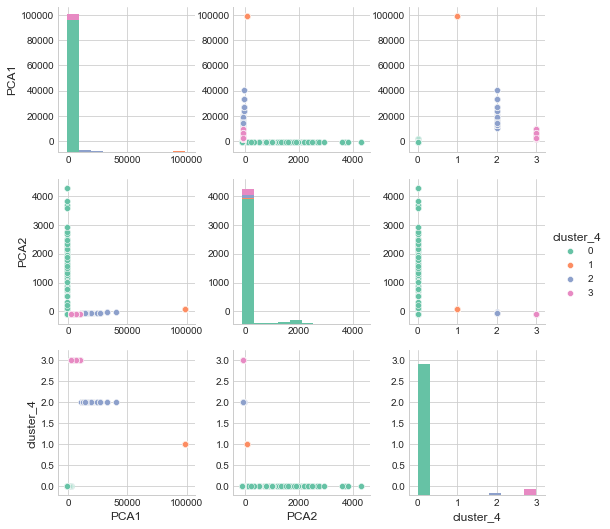

In [34]:
#K=4
kmeans_model_4 = KMeans(n_clusters=4,random_state=123)
distances_4 = kmeans_model_4.fit_transform(data_PCA_df.iloc[:,0:2])
labels_4 = kmeans_model_4.labels_
data_PCA_df['cluster_4']=labels_4
with sns.color_palette("Set2", 10):
    sns.pairplot(data_PCA_df.iloc[:,[0,1,6]], hue='cluster_4')

In [35]:
#compare labels K=4
tb1 = pd.crosstab(data_PCA_df['income_name'],labels_4)
tb1

col_0,0,1,2,3
income_name,,,,
<=50K,24147,0,8,565
>50K,6164,159,542,976


In [36]:
data_PCA_df['cluster_4_label']=data_PCA_df['cluster_4'].apply(cluster_1_label)
data_PCA_df.head()

,PCA1,PCA2,income,income_name,cluster_1,cluster_1_label,cluster_4,cluster_4_label
0,1096.500633,-85.406088,0,<=50K,0,<=50K,0,<=50K
1,-1077.497967,-89.189598,0,<=50K,0,<=50K,0,<=50K
2,-1077.496355,-89.169952,0,<=50K,0,<=50K,0,<=50K
3,-1077.494285,-89.140365,0,<=50K,0,<=50K,0,<=50K
4,-1077.497600,-89.187903,0,<=50K,0,<=50K,0,<=50K


In [37]:
#cluster_4_label
data_PCA_df['cluster_4_label']=data_PCA_df['cluster_4'].apply(cluster_1_label)
data_PCA_df.head()

,PCA1,PCA2,income,income_name,cluster_1,cluster_1_label,cluster_4,cluster_4_label
0,1096.500633,-85.406088,0,<=50K,0,<=50K,0,<=50K
1,-1077.497967,-89.189598,0,<=50K,0,<=50K,0,<=50K
2,-1077.496355,-89.169952,0,<=50K,0,<=50K,0,<=50K
3,-1077.494285,-89.140365,0,<=50K,0,<=50K,0,<=50K
4,-1077.497600,-89.187903,0,<=50K,0,<=50K,0,<=50K


In [38]:
#find center of K-means=4
centroids_PCA1 = kmeans_model_1.cluster_centers_
print (centroids_PCA1)

[[ -4.85417425e+02  -4.11330140e-01]
 [  9.89213547e+04   8.38233911e+01]]


In [39]:
#find center of K-means=40
centroids_PCA4 = kmeans_model_4.cluster_centers_

In [40]:
data_PCA_df.head()

,PCA1,PCA2,income,income_name,cluster_1,cluster_1_label,cluster_4,cluster_4_label
0,1096.500633,-85.406088,0,<=50K,0,<=50K,0,<=50K
1,-1077.497967,-89.189598,0,<=50K,0,<=50K,0,<=50K
2,-1077.496355,-89.169952,0,<=50K,0,<=50K,0,<=50K
3,-1077.494285,-89.140365,0,<=50K,0,<=50K,0,<=50K
4,-1077.497600,-89.187903,0,<=50K,0,<=50K,0,<=50K


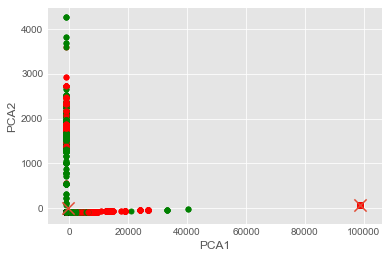

In [41]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
colors = ["g.", "r.", "b.", "y"]
for i in range(len(data_PCA_df)):
    plt.plot(data_PCA_df.iloc[i,0],data_PCA_df.iloc[i,1], colors[data_PCA_df.iloc[i,2]], markersize = 10)    
plt.scatter(centroids_PCA1[:,0], centroids_PCA1[:,1],marker="x", s=150, linewidths =5, zorder=10)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()


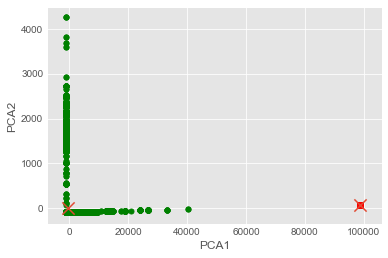

In [42]:
style.use("ggplot")
colors = ["g.", "r.", "b.", "y.", "c.", "m.", "k.", "w.",
          "g.", "r.", "b.", "y.", "c.", "m.", "k.", "w.",
          "g.", "r.", "b.", "y.", "c.", "m.", "k.", "w.",
          "g.", "r.", "b.", "y.", "c.", "m.", "k.", "w.",
          "g.", "r.", "b.", "y.", "c.", "m.", "k.", "w."]
for i in range(len(data_PCA_df)):
    plt.plot(data_PCA_df.iloc[i,0],data_PCA_df.iloc[i,1], colors[data_PCA_df.iloc[i,4]], markersize = 10)    
plt.scatter(centroids_PCA1[:,0], centroids_PCA1[:,1],marker="x", s=150, linewidths =5, zorder=10)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()


In [43]:
d_corr_PCA2=data_PCA_df.iloc[:,[0,1,4]].corr()
d_corr_PCA2
#lug_boot and persons

,PCA1,PCA2,cluster_1
PCA1,1.000000e+00,-1.806608e-13,0.938299
PCA2,-1.806608e-13,1.000000e+00,0.014579
cluster_1,9.382985e-01,1.457936e-02,1.000000


In [44]:
cluster_1_accuracy = len(data_PCA_df[data_PCA_df['income_name']==data_PCA_df['cluster_1_label']])/len(data_PCA_df)
cluster_4_accuracy = len(data_PCA_df[data_PCA_df['income_name']==data_PCA_df['cluster_4_label']])/len(data_PCA_df)
print('K=2 KMeans -> {0:.4f}%'.format(cluster_1_accuracy*100))
print('K=4 KMeans -> {0:.4f}%'.format(cluster_4_accuracy*100))

K=2 KMeans -> 76.4074%
K=4 KMeans -> 79.3096%


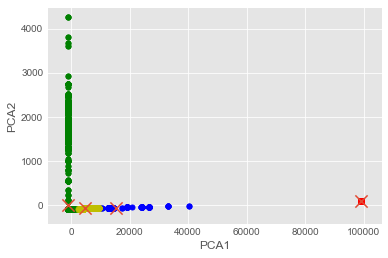

In [45]:
style.use("ggplot")
colors = ["g.", "r.", "b.", "y.", "c.", "m.", "k.", "w.",
          "g.", "r.", "b.", "y.", "c.", "m.", "k.", "w.",
          "g.", "r.", "b.", "y.", "c.", "m.", "k.", "w.",
          "g.", "r.", "b.", "y.", "c.", "m.", "k.", "w.",
          "g.", "r.", "b.", "y.", "c.", "m.", "k.", "w."]
for i in range(len(data_PCA_df)):
    plt.plot(data_PCA_df.iloc[i,0],data_PCA_df.iloc[i,1], colors[data_PCA_df.iloc[i,6]], markersize = 10)    
plt.scatter(centroids_PCA4[:,0], centroids_PCA4[:,1],marker="x", s=150, linewidths =5, zorder=10)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()
